# Unsupervised learning

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

clustering_data = pd.read_csv("data/clustering_data.csv")
clustering_pca = pd.read_csv("data/clustering_pca_data.csv")
pca_check = pd.read_csv("data/pca_validation_data.csv")
cluster_check = pd.read_csv("data/validation_data.csv")

**Most of the code in this notebook is doubled - we are comparing PCA approach and plain data**

# Flat clustering - k-means with 2 clusters

In [31]:
# initialize k-means
kmeans = KMeans(n_clusters = 2, n_init = 'auto', random_state=1337)
kmeans_pca = KMeans(n_clusters=2, n_init='auto', random_state=1337)
# fit
kmeans.fit(clustering_data)
kmeans_pca.fit(clustering_pca)

KMeans(n_clusters=2, n_init='auto', random_state=1337)

In [32]:
# save the centroids for easier visualization
centers = kmeans.cluster_centers_
centers_pca = kmeans_pca.cluster_centers_

### Visualize

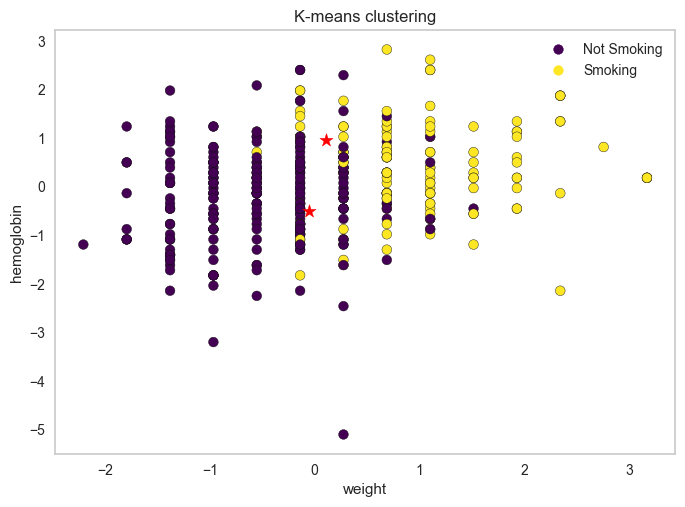

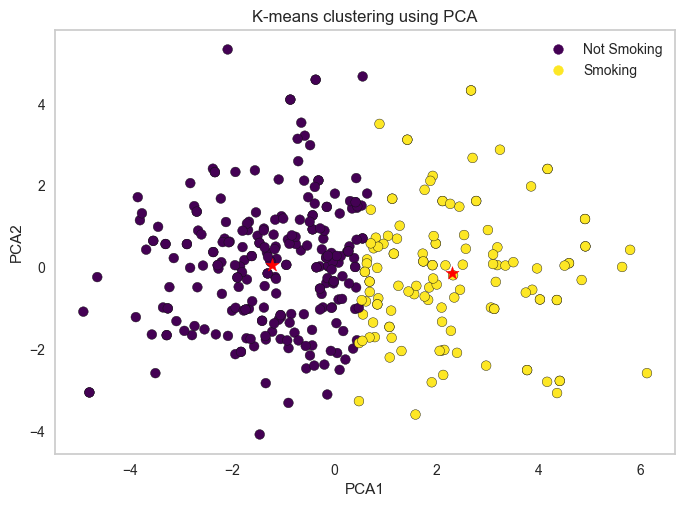

In [33]:
scatter1 = plt.scatter(x = clustering_data['weight(kg)'], y = clustering_data['hemoglobin'], c = kmeans.labels_, cmap = 'viridis', edgecolors='k')
plt.scatter(centers[:,0], centers[:,1], marker='*', s=100, c='red')
plt.title('K-means clustering')
plt.xlabel('weight')
plt.ylabel('hemoglobin')
plt.grid(False)
plt.legend(handles=scatter1.legend_elements()[0], labels=("Not Smoking","Smoking"))
plt.show()

scatter2 = plt.scatter(x = clustering_pca['pca1'],y =  clustering_pca['pca2'], c = kmeans_pca.labels_, cmap = 'viridis', edgecolors='k')
plt.scatter(centers_pca[:,0], centers_pca[:,1], marker='*', s=100, c='red')
plt.title('K-means clustering using PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(handles=scatter2.legend_elements()[0], labels=("Not Smoking", "Smoking"))
plt.grid(False)
plt.show()

In [34]:
clustering_data

,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting_blood_sugar,...,serum_creatinine,ast,alt,gtp,tartar,bmi,healthy_weight,eyesight_total,vision,hearing_impairment
0,0.528699,0.275122,-0.173268,1.188941,1.215774,-0.090289,-0.073621,0.175105,-0.004969,-0.345844,...,-0.411054,-0.056039,-0.487112,0.078516,0,0.079493,0.0,3.0,0,0
1,0.528699,0.275122,0.419408,-0.246922,-0.189373,-0.090289,-0.073621,0.009381,-0.465854,-0.040106,...,0.301568,-0.253105,0.236305,-0.255260,0,0.079493,0.0,2.0,1,0
2,-0.375206,-0.138118,-0.378425,-0.246922,0.372686,-0.090289,-0.073621,-0.073482,-0.120190,-0.142018,...,1.014189,-0.056039,-0.487112,-0.376633,1,0.008919,0.0,2.2,1,0
3,-0.375206,-0.964596,-1.176258,0.327423,1.215774,-0.090289,-0.073621,-0.984966,0.455916,-0.447756,...,-1.123675,-0.253105,-0.577540,-0.467663,1,-0.895465,0.0,2.7,0,0
4,-0.375206,0.275122,-0.367028,-1.682785,-1.032461,-0.090289,-0.073621,-1.482139,-1.618066,1.590496,...,0.301568,-0.203838,-0.396685,-0.224916,1,0.461112,1.0,1.2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,0.528699,-0.551357,-1.290234,1.188941,0.372686,-0.090289,-0.073621,-0.156344,0.455916,-0.345844,...,-0.411054,-0.056039,-0.215831,-0.194573,0,-0.775229,0.0,2.7,0,0
367,-0.375206,0.688361,0.544781,2.624803,1.215774,-0.090289,-0.073621,-0.156344,0.455916,0.265632,...,1.726810,0.239560,1.683140,0.169546,1,0.913304,1.0,3.5,0,0
368,-0.375206,-0.138118,0.670155,0.327423,0.372686,-0.090289,-0.073621,1.335176,0.686358,-0.753494,...,-0.411054,-0.154572,-0.532326,-0.467663,1,0.008919,0.0,2.4,1,0
369,0.528699,-0.138118,0.077479,-0.246922,-0.470402,-0.090289,-0.073621,0.009381,-0.465854,0.673282,...,-0.411054,0.485892,0.552800,-0.164230,1,-0.346561,0.0,1.9,1,0


### Elbow visualizer

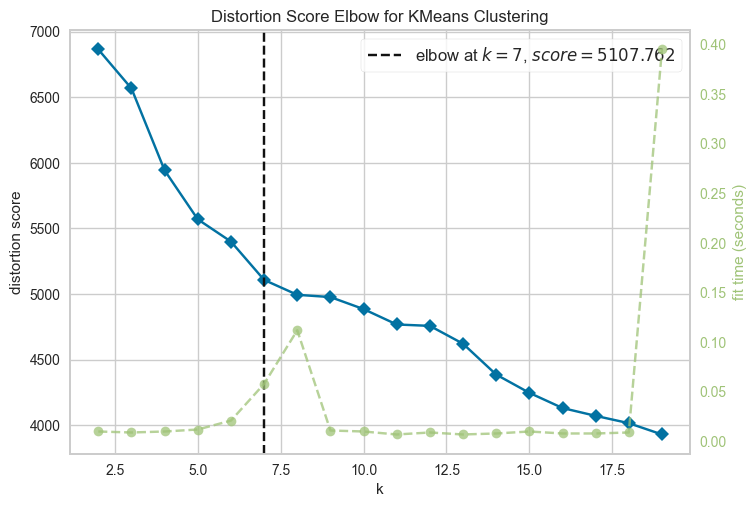

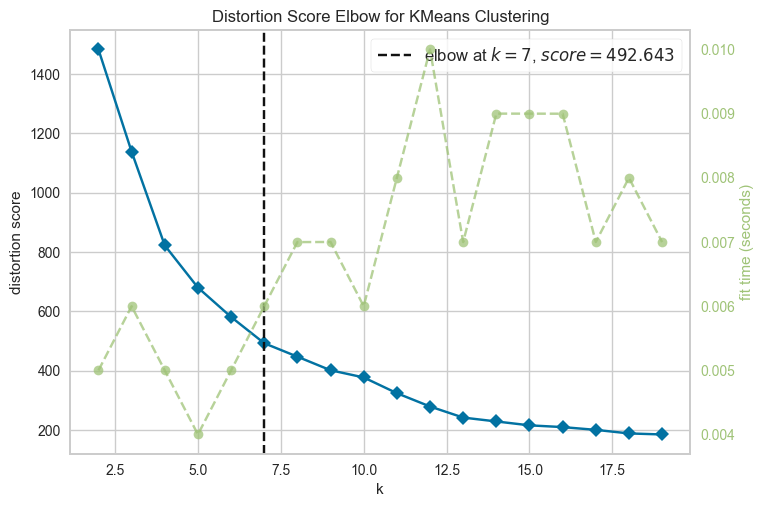

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
# initialize k-means
clusters = KMeans(max_iter = 500, n_init="auto", random_state=1337)
# create visualizer
visual = KElbowVisualizer(clusters, k = (2, 20))
visual.fit(clustering_data)
visual.show()

# repeat for PCA
clusters_pca = KMeans(max_iter = 500, n_init="auto", random_state=1337)
visual_pca = KElbowVisualizer(clusters_pca, k = (2, 20))
visual_pca.fit(clustering_pca)
visual_pca.show()

In [36]:
# initialize
kmeans_optim = KMeans(n_clusters=7, n_init='auto', random_state=1337)
kmeans_pca_optim = KMeans(n_clusters=7, n_init='auto', random_state=1337)

# fit
kmeans_optim.fit(clustering_data)
kmeans_pca_optim.fit(clustering_pca)

# save centers for easier visualizaion
centers = kmeans_optim.cluster_centers_
centers_pca = kmeans_pca_optim.cluster_centers_

### Evaluation

In [37]:
# silhouette score of the clusters built from data
print("silhouette score from data: ", silhouette_score(clustering_data, kmeans_optim.labels_))
# silhouette score of the principal components
print("silhouette score from pca: ", silhouette_score(clustering_pca, kmeans_pca_optim.labels_))

print(f"Rand index for PCA: {adjusted_rand_score(pca_check['target'], kmeans_pca.labels_)}")
print(f"Rand index without PCA: {adjusted_rand_score(cluster_check['smoking'], kmeans.labels_)}")

silhouette score from data:  0.0799132804780958
silhouette score from pca:  0.34527619884056143
Rand index for PCA: 0.4988271290158083
Rand index without PCA: 0.4989436876229329


### Visualization

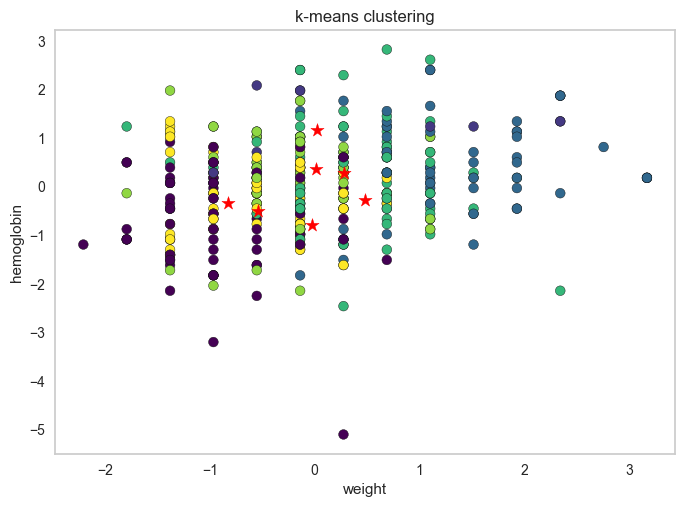

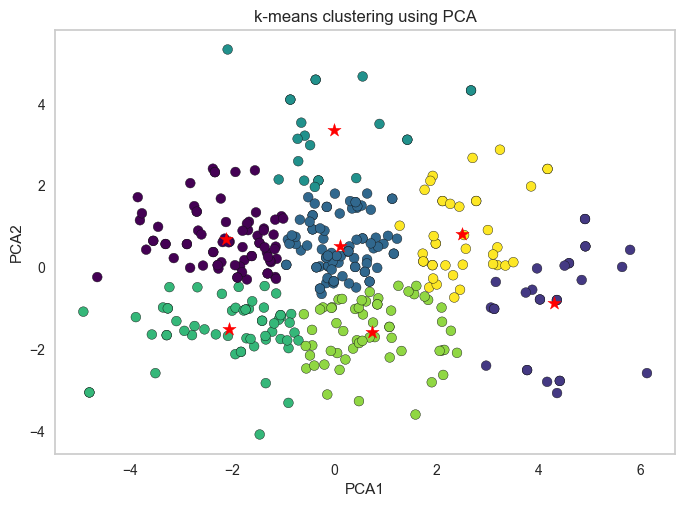

In [38]:
# visualize
plt.scatter(x = clustering_data['weight(kg)'],y =  clustering_data['hemoglobin'], c = kmeans_optim.labels_, cmap = 'viridis', edgecolors='k')
plt.scatter(centers[:,0], centers[:,1], marker='*', s=100, c='red')
plt.title('k-means clustering')
plt.xlabel('weight')
plt.ylabel('hemoglobin')
plt.grid(False)
plt.show()

plt.scatter(x = clustering_pca['pca1'],y =  clustering_pca['pca2'], c = kmeans_pca_optim.labels_, cmap = 'viridis', edgecolors='k')
plt.scatter(centers_pca[:,0], centers_pca[:,1], marker='*', s=100, c='red')
plt.title('k-means clustering using PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid(False)
plt.show()

# Hierarchical clustering

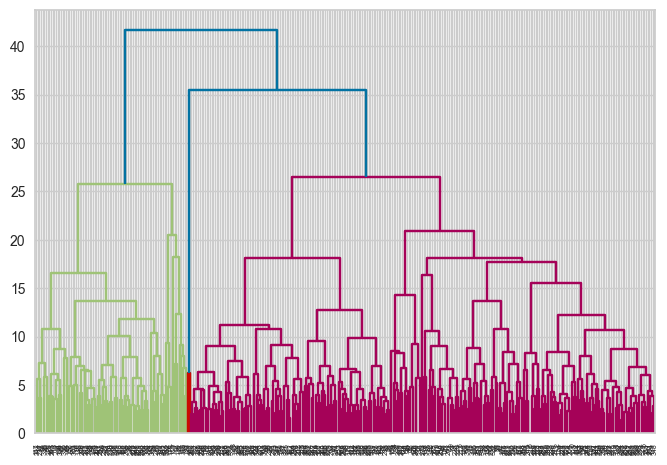

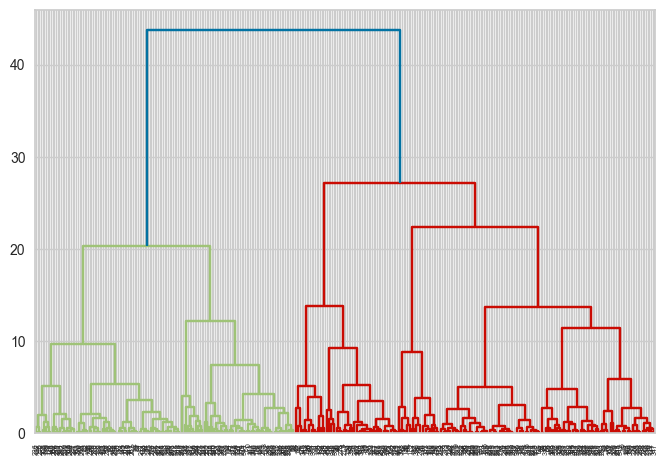

In [39]:
# visualize both dendrograms
linkage_data = linkage(clustering_data, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.show()

linkage_pca = linkage(clustering_pca, method='ward', metric='euclidean')
dendrogram(linkage_pca)
plt.show()

### Agglomerative clustering

In [45]:
# initialize clusters
clusters = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')

# assign data to clusters
predictions = clusters.fit_predict(clustering_data)
print("number of predictions of class 1 in data: ", predictions.sum())
predictions_pca = clusters.fit_predict(clustering_pca)
print("Number of predictions on class 1 in pca: ", predictions_pca.sum())

number of predictions of class 1 in data:  91
Number of predictions on class 1 in pca:  155


### Evaluation

In [41]:
# silhouette score of the clusters built from data
print("silhouette score from data: ", silhouette_score(clustering_data, predictions))
# silhouette score of the principal components
print("silhouette score from pca: ", silhouette_score(clustering_pca, predictions_pca))

print(f"Rand index for PCA: {adjusted_rand_score(pca_check['target'], predictions_pca)}")
print(f"Rand index without PCA: {adjusted_rand_score(cluster_check['smoking'], predictions)}")

silhouette score from data:  0.1663521317395718
silhouette score from pca:  0.3310405553865953
Rand index for PCA: 0.49926422379252566
Rand index without PCA: 0.49996357543527353


### visualization

In [42]:
#add cluster predictions to data
clustering_data['predictions'] = predictions
clustering_pca['predictions'] = predictions_pca

clustering_pca

,pca1,pca2,predictions
0,-1.344923,-1.749165,1
1,0.385150,0.238137,0
2,-1.133579,0.217776,1
3,-2.007626,-1.046821,1
4,-0.594788,2.124993,0
...,...,...,...
366,-1.418710,-1.292505,1
367,1.587550,-3.580762,0
368,-0.013114,-0.329391,0
369,0.432734,0.683308,0


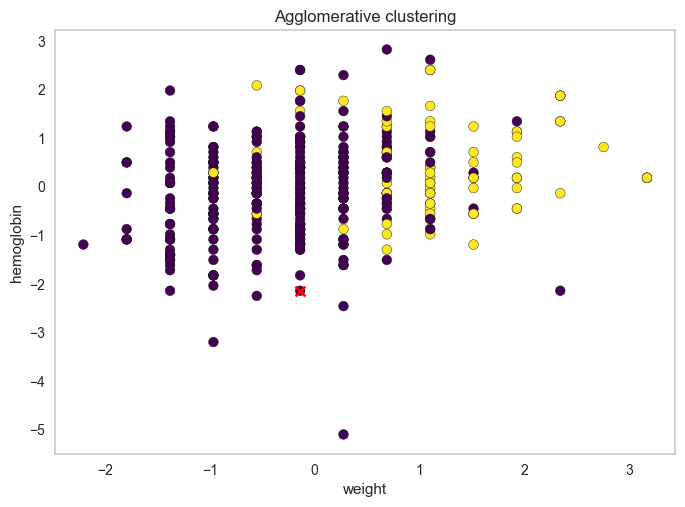

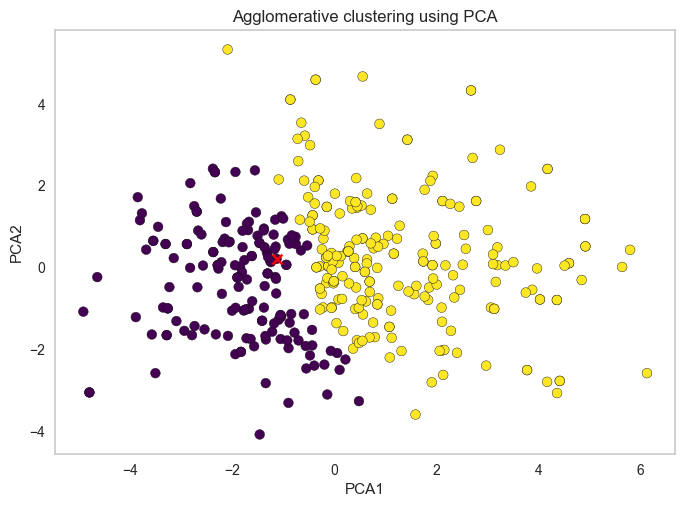

In [49]:
# draw plots
scatter1 = plt.scatter(x = clustering_data['weight(kg)'],y =  clustering_data['hemoglobin'], c = clustering_data['predictions'], cmap = 'viridis', edgecolors='k')
plt.title('Agglomerative clustering')
plt.xlabel('weight')
plt.ylabel('hemoglobin')
plt.grid(False)
# add the instance of interest
plt.scatter(x = -0.138118, y = -2.141766, c='red', marker='x')
plt.show()

# in PCA we reverse predictions (change 0s to 1s and vice versa) for better readability of colors
clustering_pca['predictions'] = clustering_pca['predictions'].replace([0,1],[1,0])

scatter2 = plt.scatter(x = clustering_pca['pca1'], y = clustering_pca['pca2'], c = clustering_pca['predictions'], cmap = 'viridis', edgecolors='k')
plt.title('Agglomerative clustering using PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid(False)
# add the instance of interest
plt.scatter(x =-1.133579, y = 0.217776, c='red', marker='x')
plt.show()